In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds2=pd.read_csv('avocado.csv')
ds2=pd.DataFrame(ds2)
ds=ds2.copy()

Dropping un necessary column

In [3]:
ds.columns

Index(['row', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [4]:
ds=ds[['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region']]

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


1. We see that the date is in obect formate so we will change it to Date Format
2. There is no null values
3. Type and Region columns are in object format
4. Year is in int64 format.

In [6]:
#Changing to DateTime Format
from datetime import datetime
ds1=pd.to_datetime(ds['Date'])
ds1=pd.DataFrame(ds1)
ds['Date']=ds1['Date']

In [7]:
ds.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

The Date Column has changed to date format.

# Data Analysis


# Uni-Variant Analysis

In [8]:
ds

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


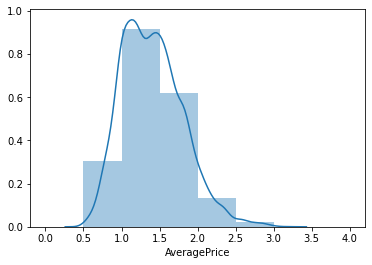

In [9]:
#plotting distplot to analyse most sale of Average price
sns.distplot(ds['AveragePrice'], bins=(0,.5,1,1.5,2,2.5,3,3.5,4))

Here we can observe that most of the avocado has the price per unit is of the range 1.0 to 1.5

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

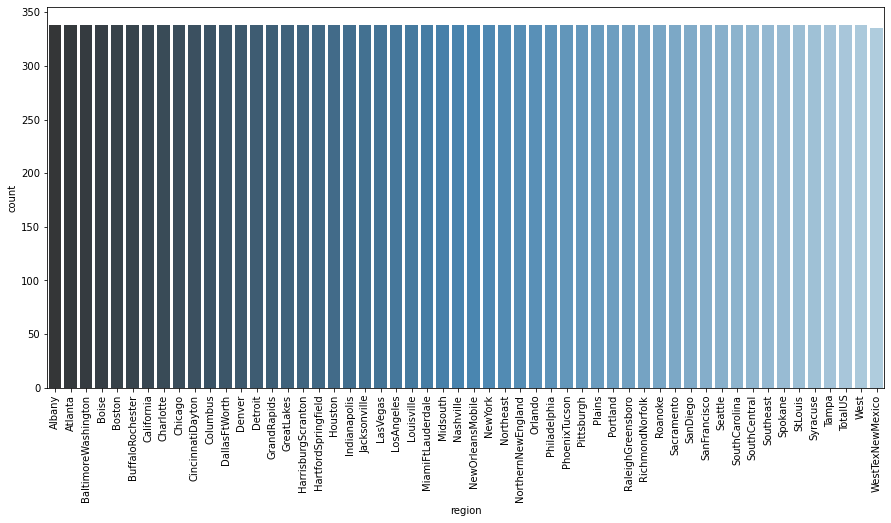

In [10]:
#observing frequency of region
plt.figure(figsize=(15,7))
sns.countplot(ds['region'], palette="Blues_d")
plt.xticks(rotation=90)

Here we see that data is balanced, so, when we bulid model our preferd matics will be Accuracy score

# Bi-Varient Analysis

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

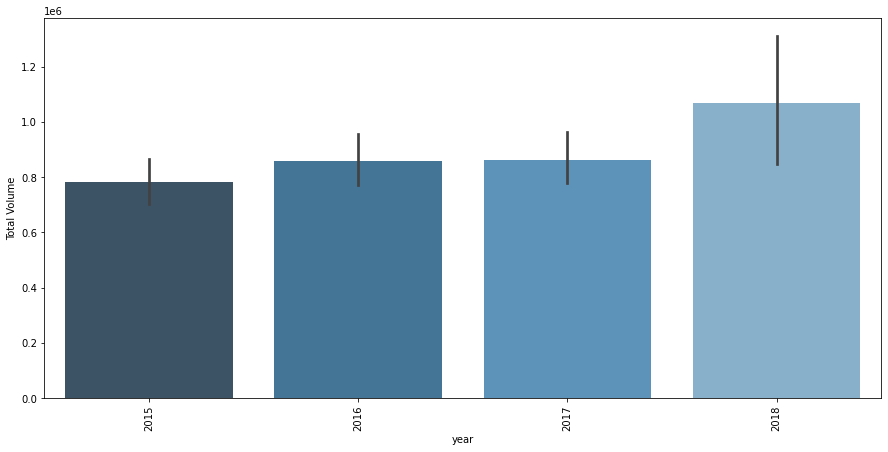

In [11]:
#Plotting bar Graph to compare sales of different years
plt.figure(figsize=(15,7))
sns.barplot(x='year', y='Total Volume', data=ds, palette="Blues_d")
plt.xticks(rotation=90)

Here we see the growth in year 2016 but in2017 no growth cold be seen whatsoever, but approximately 20% growth canbe seen in year 2020, hwnce we can conclude that demanding of avacado is increasing

In [12]:
#extracting month for further analysis
pd.DatetimeIndex(ds['Date']).month

Int64Index([12, 12, 12, 12, 11, 11, 11, 11, 11, 10,
            ...
             3,  3,  2,  2,  2,  2,  1,  1,  1,  1],
           dtype='int64', name='Date', length=18249)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text major ticklabel objects>)

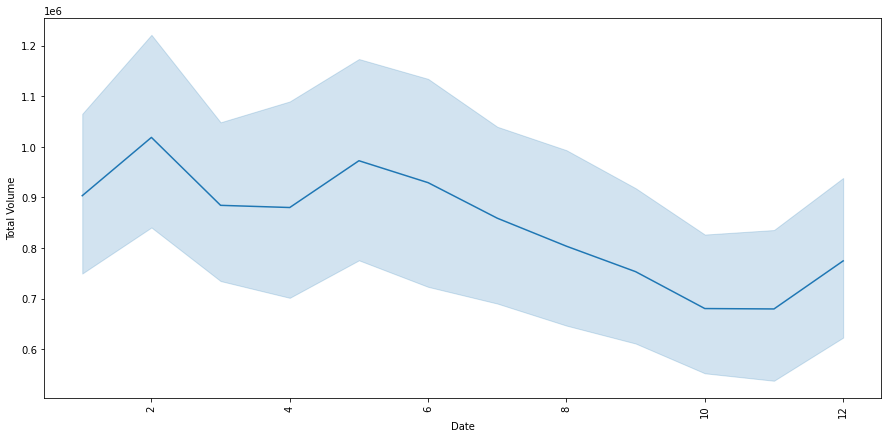

In [13]:
#Plotting LinePlot to see overall sales of months
plt.figure(figsize=(15,7))
sns.lineplot(x=pd.DatetimeIndex(ds['Date']).month, y='Total Volume', data=ds, palette="summer")
plt.xticks(rotation=90)

Here we see the decrement of sales through out the year espessially after summers

Text(0.5, 1.0, '2018')

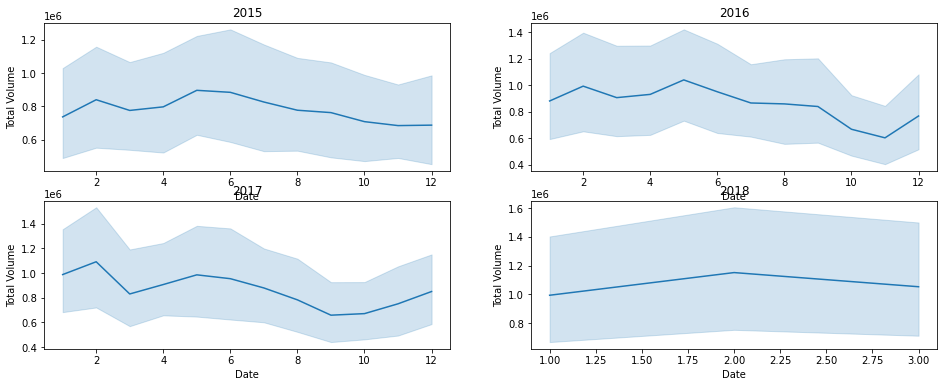

In [14]:
#seprating years
year1=ds[ds['year']==2015]
year2=ds[ds['year']==2016]
year3=ds[ds['year']==2017]
year4=ds[ds['year']==2018]

#plotting graph to compare sales of months per year
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
sns.lineplot(x=pd.DatetimeIndex(year1['Date']).month, y='Total Volume', data=year1, palette="summer")
plt.title("2015")

plt.subplot(2,2,2)
sns.lineplot(x=pd.DatetimeIndex(year2['Date']).month, y='Total Volume', data=year2, palette="summer")
plt.title("2016")

plt.subplot(2,2,3)
sns.lineplot(x=pd.DatetimeIndex(year3['Date']).month, y='Total Volume', data=year3, palette="summer")
plt.title("2017")

plt.subplot(2,2,4)
sns.lineplot(x=pd.DatetimeIndex(year4['Date']).month, y='Total Volume', data=year4, palette="summer")
plt.title("2018")

Here we analyise that avocado sale hikes up during summer time but decline as we go through summer to winter, after monthly sale of all 4 years of data we see that best year was 2018 we see the least decrement in sales as we move forward with the months

# Types of Avocado

conventional    9126
organic         9123
Name: type, dtype: int64


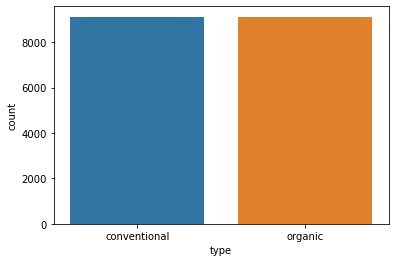

In [15]:
#comparing different type of avacado
print(ds['type'].value_counts())
sns.countplot(ds['type'])

The data of both of the Avocado is Balanced

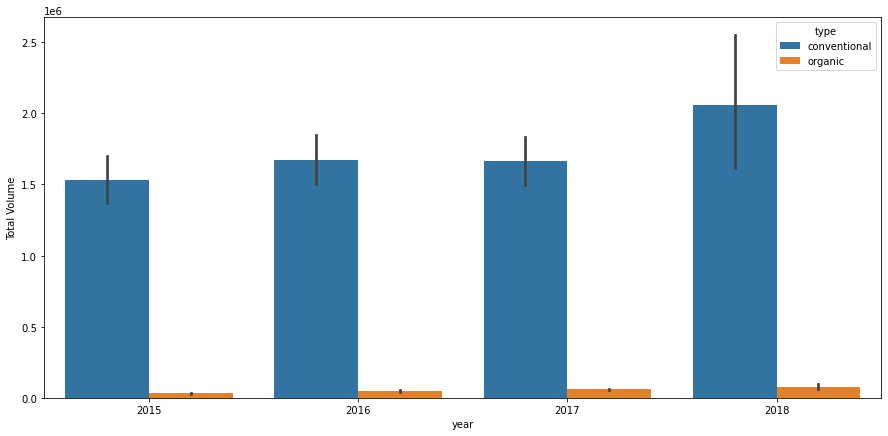

In [16]:
#Plotting bar plot to compare sales of type of avocado in different years
plt.figure(figsize=(15,7))
sns.barplot(x='year', y='Total Volume', data=ds, hue='type')

we see that conventional type avocado has more sale than organic type and as we saw the increment in sales but we can see the jump is more in conventional type but in organic type the sale hike is not so much.


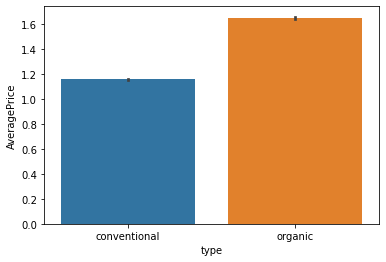

In [17]:
#Plotting bar plot to see price differecr of type of avocado
sns.barplot(x='type', y='AveragePrice', data=ds)

We see that price of organic is more than conventional and as we saw above that sale of conventional is more so we can assume that price plays importnat role rather then the origination of avocado.

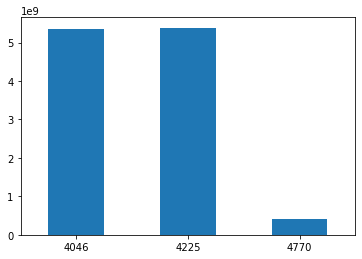

In [18]:
#Plotiing bar plot to compare sales of different PLUs
ds[['4046', '4225', '4770']].sum().plot.bar(rot=0, )

Here we observe that PLU 4040, 4225 has almost equal sale but 4770 has only 10% sale compare to the other PLUs

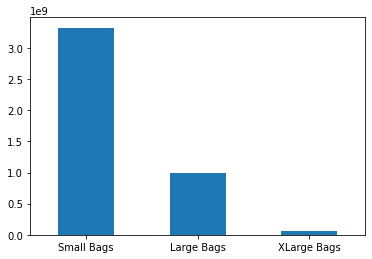

In [19]:
#Plotiing bar plot to compare sales of different bags
ds[['Small Bags', 'Large Bags', 'XLarge Bags']].sum().plot.bar(rot=0)

We see that people prefer to buy small bags rather than large and XL bags, and as we are increasing size of bags sale is decreasing

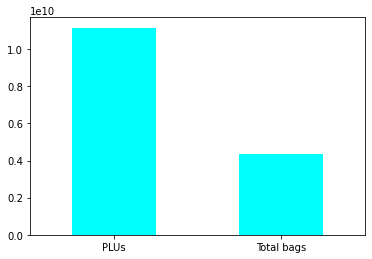

In [20]:
#sale of total PLUs
com=pd.DataFrame(ds['4046']+ds['4225']+ds['4770'])
com['Total bags']=ds['Total Bags']
com.rename(columns={0: 'PLUs'}, inplace=True)

#comparing sale of single unit Vs Bags
com[['PLUs', 'Total bags']].sum().plot.bar(rot=0, color='cyan')

We saw that sale of single unit is more as compare to bags.

In [21]:
#finding error in entries
((ds['4046']+ds['4225']+ds['4770']+ds['Small Bags']+ds['Large Bags']+ds['XLarge Bags'])-(ds['Total Volume'])).sum()


-38008.689999945804

Here we are adding the sales value of all the PLUs and Bags and substracting it with total sale given to us. If entries were correct but we got difference of 38008. 
hence, total number od misentries are 38008

# Correlation

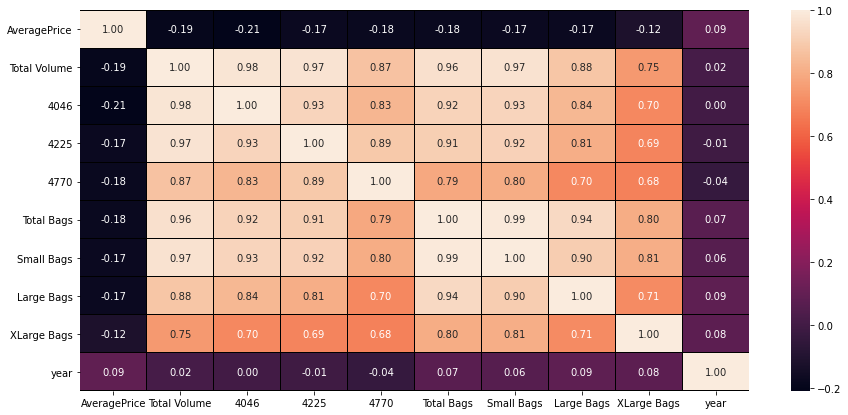

In [22]:
#Correlation Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(ds.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

High Correlation with sales = PLUs and Bags

Mild Correlation with sales = Year

Low Correlation with sales = Price

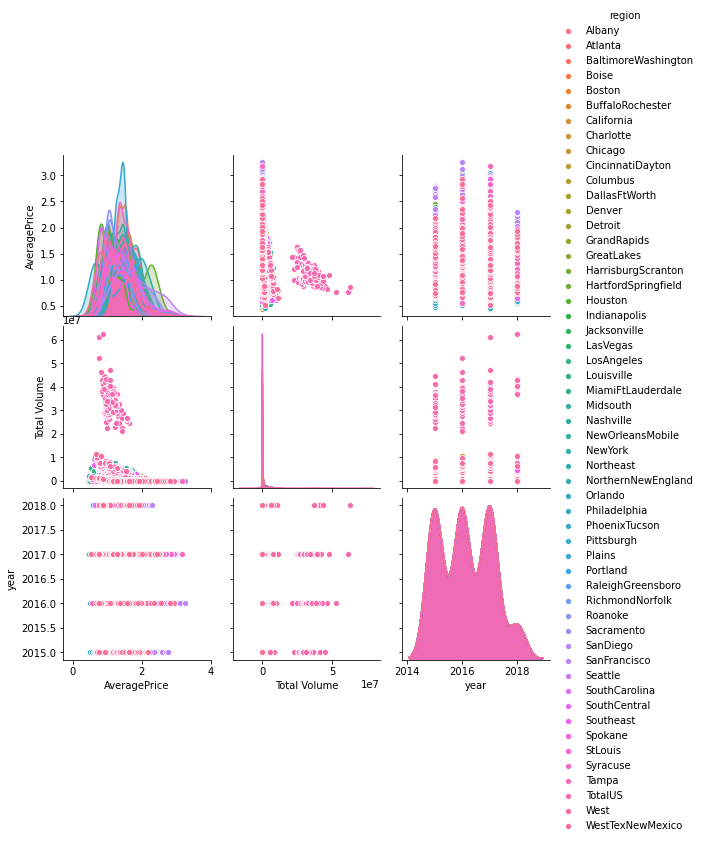

In [23]:
#Pair Plot to see relation
sns.pairplot(ds , hue='region', vars=['AveragePrice','Total Volume','year'])

# Outliers

AveragePrice       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Total Volume    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
4046             AxesSubplot(0.44569,0.536818;0.133621x0.343182)
4225            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
4770            AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Total Bags            AxesSubplot(0.125,0.125;0.133621x0.343182)
Small Bags         AxesSubplot(0.285345,0.125;0.133621x0.343182)
Large Bags          AxesSubplot(0.44569,0.125;0.133621x0.343182)
XLarge Bags        AxesSubplot(0.606034,0.125;0.133621x0.343182)
year               AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

<Figure size 864x432 with 0 Axes>

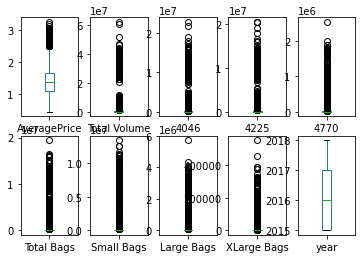

In [24]:
#Plotting Boxplot to see Outliers
plt.figure(figsize=(12,6))
ds.plot(kind='box', subplots=True, layout=(2,5))

we see that columns
AveragePrice 
Total Volume
4046
4225	
4770	
Total Bags	
Small Bags	
Large Bags	
XLarge Bags	
Have Huge Outliers

In [25]:
#Making Seprate rows of month and day
ds['Month']=pd.DatetimeIndex(ds['Date']).month
ds['Day']=pd.DatetimeIndex(ds['Date']).day
ds.drop('Date', axis=1, inplace=True)

We are doing this date column is in dateTime format which will always give error while removing outliers and making model

# Removing Outliers

In [26]:
#importing Zscore Library
from scipy import stats
from scipy.stats import zscore

#Applying Zscore to the columns with outliers
l1=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
z=abs(zscore(ds[l1]))

#printing all the data with zscore is greater than 3
print(np.where(z>3))

#removing all the rows having zscore greater than 3
ds=ds[(z<3).all(axis=1)]

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


# Data Featuring

In [27]:
#Encoding columns with catagorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Label = ['region','year','type']

for i in Label:
    ds[i] = le.fit_transform(ds[i])

# Buliding Model

In [28]:
First we will analyse the region 

SyntaxError: invalid syntax (<ipython-input-28-80f3a80e60fa>, line 1)

# Classification

In [ ]:
#Making X and Y variables
xcal=ds.drop('type', axis=1)
ycal=ds['type']

In [ ]:
#Stndard Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xcal=sc.fit_transform(xcal)

In [ ]:
#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#testing Different Models
model=[LogisticRegression(),SVC(), DecisionTreeClassifier(), KNeighborsClassifier()]

x_train,x_test,y_train,y_test=train_test_split(xcal,ycal, random_state=42, test_size=0.20)

for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    print(i.score(x_train,y_train))
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print()
    print('..................................................................................................................')

As our preferd metrix is Accuracy Score and we see decision tree has the best accuracy score as well as model score so we proceed with accuracy score

In [ ]:
#Hyper Parameter Tuning

#Grid Search 
dtc_para= {'criterion': ['gini' , 'entropy']}

dtcgd=GridSearchCV( estimator=DecisionTreeClassifier() ,param_grid=dtc_para ,scoring='accuracy' ,cv=5)
dtcgd.fit(xcal,ycal)
best_para=dtcgd.best_params_
best_score=dtcgd.best_score_
print(best_para)
print(best_score)

#Finding best random score
max_ac_score=0
dtc=DecisionTreeClassifier(criterion='entropy')
for r_state in range(35,100):
    x_train,x_test,y_train,y_test=train_test_split(xcal,ycal, random_state=r_state, test_size=0.20)
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    acc_score=accuracy_score(y_test,preddtc)
    if acc_score>max_ac_score:
        max_ac_score=acc_score
        final_rs=r_state
print('max accuracy score corrosponding to' ,final_rs ,'is', max_ac_score)

Here we see that best criterion is Entropy

Best random score is 60

In [ ]:
#Calling Model
dtc=DecisionTreeClassifier(criterion='gini')

#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(xcal,ycal, random_state=60, test_size=0.20)

#fitting Train data in model
dtc.fit(x_train,y_train)

#Predecting Values
preddtc=dtc.predict(x_test)

#printing Matrics
print(dtc.score(x_train,y_train))
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

In [ ]:
#Cross Valadation
from sklearn.model_selection import cross_val_score
cross_val_score(dtc,xcal,ycal,cv=5).mean()

1. As our accuracy score is 99%
2. cross valadation score is 97% 
Hence, no boosing is required

In [ ]:
#Saving best Model
import joblib
joblib.dump(dtc,"avocado_region.pkl")

# Regression

Now we will build model to predict average sales

In [ ]:
#Making X and Y variables
xreg=ds.drop('Total Volume', axis=1)
yreg=ds['Total Volume']

In [ ]:
#Stndard Scaling
sc=StandardScaler()
xcal=sc.fit_transform(xreg)

In [ ]:
#ML Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV

#metrics
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
#testing Different Models
model=[LinearRegression(),SVR(), DecisionTreeRegressor(), KNeighborsRegressor(),Lasso(), Ridge(), ElasticNet()]

xr_train,xr_test,yr_train,yr_test=train_test_split(xreg, yreg, random_state=42, test_size=0.20)

for i in model:
    i.fit(xr_train,yr_train)
    pred=i.predict(xr_test)
    print(i)
    print(i.score(xr_train,yr_train))
    print('R2 Score')
    print(r2_score(yr_test,pred))
    print('MAE')
    print(mean_absolute_error(yr_test,pred))
    print('MSE')
    print(mean_squared_error(yr_test,pred))
    print()
    print('..................................................................................................................')

As our preferd metrix is R2 Score and minimum errors,as we see Elastic Net has the best R2 score as well as model score also good
so we proceed with Elastic Net

In [ ]:
#HyperParameter Tuning
parameter={'alpha':[.0001,.001,.01,.1,1.0,10,100],'random_state': range(35,100)}

#Grid Search
el=GridSearchCV(ElasticNet(),parameter)
el.fit(xreg,yreg)
best_para=el.best_params_
print(best_para)

Here we see that best Alpha is 1.0

Best random score is 35

In [ ]:
#Calling Model
ela= ElasticNet(alpha=1, random_state=35)

#Train Test Split
xr_train,xr_test,yr_train,yr_test=train_test_split(xreg, yreg, random_state=35, test_size=0.20)

#fitting Train data in model
ela.fit(xr_train,yr_train)

#Predecting Values
predr=ela.predict(xr_test)


#printing Matrics
print(ela.score(xr_train,yr_train))
print('R2 Score')
print(r2_score(yr_test,predr))
print('MAE')
print(mean_absolute_error(yr_test,predr))
print('MSE')
print(mean_squared_error(yr_test,predr))
print()

In [ ]:
cross_val_score(ela,xreg,yreg,cv=5).mean()

1. As our R2 Score is 99%
2. cross valadation score is 99% 
Hence, no boosing is required

In [ ]:
#Saving best Model
import joblib
joblib.dump(dtc,"avocado_Price.pkl")